In [1]:
# Imports 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Parameters
n_cities = 20
mutation_rates = [0.1, 0.3, 0.6, 0.9]
population_sizes = [10, 20, 50, 100]

In [3]:
# Generating a list of coordenades representing each city
coordinates_list = [[x,y] for x,y in zip(np.random.randint(0,100,n_cities),np.random.randint(0,100,n_cities))]
names_list = np.array(['Berlin', 'London', 'Moscow', 'Barcelona', 'Rome', 'Paris', 'Vienna', 'Munich', 'Istanbul', 'Kyiv', 'Bucharest', 'Minsk', 'Warsaw', 'Budapest', 'Milan', 'Prague', 'Sofia', 'Birmingham', 'Brussels', 'Amsterdam'])
cities_dict = { x:y for x,y in zip(names_list,coordinates_list)}

# Function to compute the distance between two points
def compute_city_distance_coordinates(a,b):
    return ((a[0]-b[0])**2+(a[1]-b[1])**2)**0.5

def compute_city_distance_names(city_a, city_b, cities_dict):
    return compute_city_distance_coordinates(cities_dict[city_a], cities_dict[city_b])

cities_dict

{'Berlin': [34, 48],
 'London': [26, 34],
 'Moscow': [39, 40],
 'Barcelona': [84, 77],
 'Rome': [91, 5],
 'Paris': [21, 86],
 'Vienna': [3, 98],
 'Munich': [73, 15],
 'Istanbul': [13, 24],
 'Kyiv': [44, 91],
 'Bucharest': [64, 90],
 'Minsk': [20, 89],
 'Warsaw': [54, 41],
 'Budapest': [15, 15],
 'Milan': [61, 41],
 'Prague': [50, 71],
 'Sofia': [93, 91],
 'Birmingham': [27, 28],
 'Brussels': [48, 25],
 'Amsterdam': [38, 44]}

In [4]:
# First step: Create the first population set
def genesis(city_list, n_population):
    population_set = []
    for i in range(n_population):
        # Randomly generating a new solution
        sol_i = city_list[np.random.choice(list(range(n_cities)), n_cities, replace=False)]
        population_set.append(sol_i)
    return np.array(population_set)

In [5]:
# Function to compute the fitness of a solution
def fitness_eval(city_list, cities_dict):
    total = 0
    for i in range(n_cities - 1):
        a = city_list[i]
        b = city_list[i + 1]
        total += compute_city_distance_names(a, b, cities_dict)
    return total

In [6]:
def get_all_fitnes(population_set, cities_dict):
    fitnes_list = np.zeros(len(population_set))

    for i in range(len(population_set)):
        fitnes_list[i] = fitness_eval(population_set[i], cities_dict)

    return fitnes_list

In [7]:
def progenitor_selection(population_set,fitnes_list):
    total_fit = fitnes_list.sum()
    prob_list = (total_fit/fitnes_list)
    prob_list = prob_list/prob_list.sum()
    
    #Notice there is the chance that a progenitor. mates with oneself
    progenitor_list_a = np.random.choice(list(range(len(population_set))), len(population_set),p=prob_list, replace=True)
    progenitor_list_b = np.random.choice(list(range(len(population_set))), len(population_set),p=prob_list, replace=True)
    
    progenitor_list_a = population_set[progenitor_list_a]
    progenitor_list_b = population_set[progenitor_list_b]
    
    
    return np.array([progenitor_list_a,progenitor_list_b])

In [8]:
def mate_progenitors(prog_a, prog_b):
    offspring = prog_a[:5]  # Copy the first 5 cities from prog_a

    for city in prog_b:
        if city not in offspring:
            offspring = np.concatenate((offspring, [city]))

    return offspring

In [9]:
def mate_population(progenitor_list):
    new_population_set = []
    for i in range(progenitor_list.shape[1]):
        prog_a, prog_b = progenitor_list[0][i], progenitor_list[1][i]
        offspring = mate_progenitors(prog_a, prog_b)
        new_population_set.append(offspring)

    return new_population_set

In [10]:
def mutate_offspring(offspring):
    for q in range(int(n_cities * mutation_rate)):
        a = np.random.randint(0, n_cities)
        b = np.random.randint(0, n_cities)
        offspring[a], offspring[b] = offspring[b], offspring[a]

    return offspring

In [11]:
def mutate_population(new_population_set):
    mutated_pop = []
    for offspring in new_population_set:
        mutated_pop.append(mutate_offspring(offspring))
    return mutated_pop

Testing with Population Size 10 and Mutation Rate 0.1
Testing with Population Size 10 and Mutation Rate 0.3
Testing with Population Size 10 and Mutation Rate 0.6
Testing with Population Size 10 and Mutation Rate 0.9
Testing with Population Size 20 and Mutation Rate 0.1
Testing with Population Size 20 and Mutation Rate 0.3
Testing with Population Size 20 and Mutation Rate 0.6
Testing with Population Size 20 and Mutation Rate 0.9
Testing with Population Size 50 and Mutation Rate 0.1
Testing with Population Size 50 and Mutation Rate 0.3
Testing with Population Size 50 and Mutation Rate 0.6
Testing with Population Size 50 and Mutation Rate 0.9
Testing with Population Size 100 and Mutation Rate 0.1
Testing with Population Size 100 and Mutation Rate 0.3
Testing with Population Size 100 and Mutation Rate 0.6
Testing with Population Size 100 and Mutation Rate 0.9


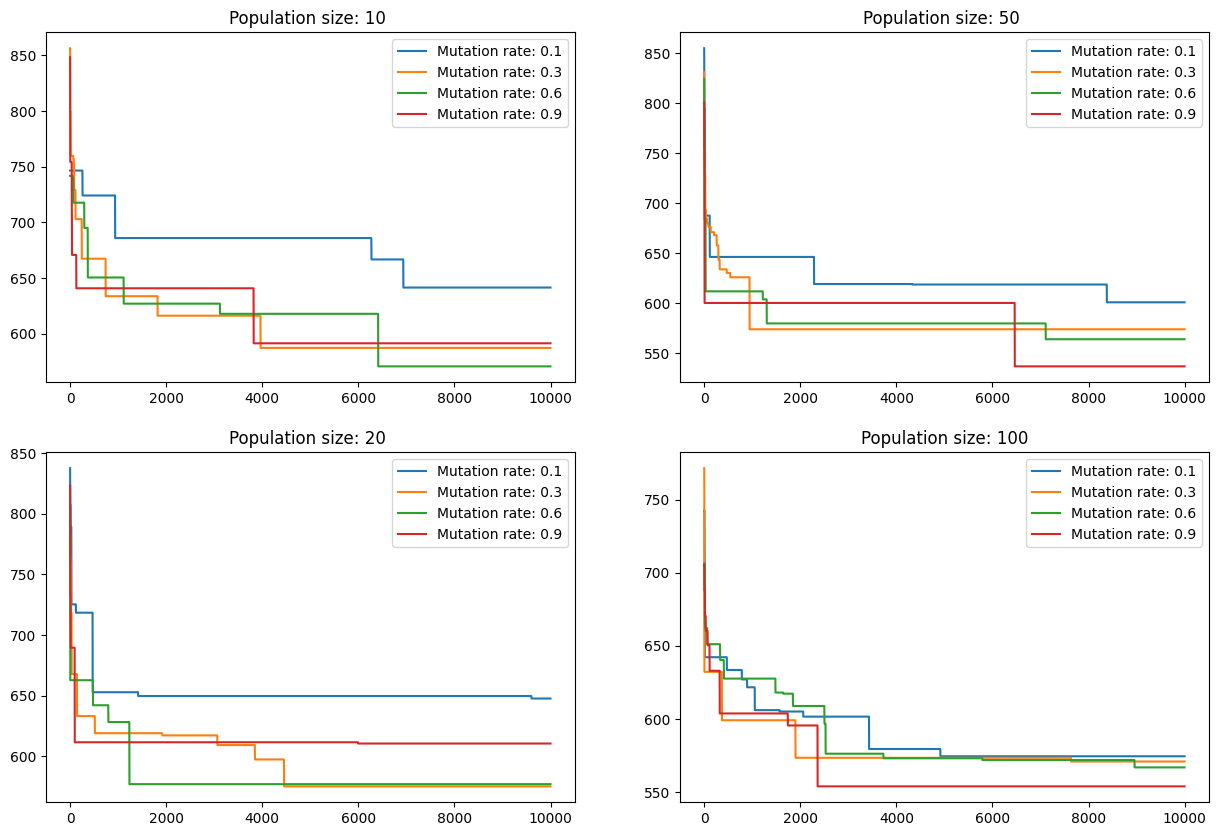

In [12]:
fitness_dict = {}

fig, ax = plt.subplots(2, 2, figsize=[15, 10])

for population_size in population_sizes:
    for mutation_rate in mutation_rates:
        print(f"Testing with Population Size {population_size} and Mutation Rate {mutation_rate}")
        
        best_solution = [-1,np.inf,np.array([])]
        
        population = genesis(names_list, population_size)
        fitness_list = get_all_fitnes(population,cities_dict)
        progenitor_list = progenitor_selection(population,fitness_list)
        new_population = mate_population(progenitor_list)
        mutated_population = mutate_population(new_population)
        
        input_dict = (str(population_size) + " : " + str(mutation_rate))
        fitness_dict[input_dict] = []

        for generation in range(10000): 
            fitness_list = get_all_fitnes(mutated_population,cities_dict)

            #Saving the best solution
            if fitness_list.min() < best_solution[1]:
                best_solution[0] = generation
                best_solution[1] = fitness_list.min()
                best_solution[2] = np.array(mutated_population)[fitness_list.min() == fitness_list]

            progenitor_list = progenitor_selection(population,fitness_list)
            new_population = mate_population(progenitor_list)
            mutated_population = mutate_population(new_population)
            fitness_dict[input_dict].append(best_solution[1])

x = 0
pop_label = '10 '
for i in list(fitness_dict.keys()):
    if i[:3] != pop_label:
        x += 1
    ax[(x % 2, x // 2)].set_title("Population size: " + i[:3])
    pop_label = i[:3]
    data_Y = fitness_dict[i]
    data_X = list(range(10000))
    ax[(x % 2, x // 2)].plot(data_X, data_Y, label = ("Mutation rate: " + i[-3:]))
    ax[(x % 2, x // 2)].legend()


plt.show()